<a href="https://colab.research.google.com/github/lorenaleite/data_science/blob/master/Analisando_os_Dados_do_Airbnb_NYC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 2.0**
Projeto elaborado em conjunto com [sigmoidal.ai](https://sigmoidal.ai)

---

# Análise dos Dados do Airbnb - New York City, United State

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**, apesar de **não possui nenhum hotel**!

Fazendo da hospedagem uma experiência personalizada. O Airbnb consegue aproximar anfitriões e hóspedes de maneira prática, através de uma plataforma inovadora, sem muita burocracia.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.


<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes a cidade da Nova Iorque nos Estados Unidos, verificando quais *insights* podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados

Todos os dados usados foram obtidos a partir do site [Airbnb](http://insideairbnb.com/get-the-data.html).

Para esta análise exploratória inicial, será baixado apenas o seguinte arquivo:

* `listings.csv` - *Summary information and metrics for listings in New York City (good for visualisations).* 


Análise realizada em 07/06/2020


In [0]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [0]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/united-states/ny/new-york-city/2020-05-06/visualisations/listings.csv")


## Análise dos Dados

Nesta estapa será descrito como a análise dos dados fora realizada


**Dicionário das variáveis**

* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - nome do anfitrião
* `neighbourhood_group` - nome do distrito
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de *reviews* que a propriedade possui
* `last_review` - data do último *review*
* `reviews_per_month` - quantidade de *reviews* por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias

Antes de iniciar qualquer análise, vamos verificar o *layout* do nosso *dataset*, analisando as 3 primeiras entradas.

In [3]:
# mostrar as 3 primeiras entradas
df.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2060,Modern NYC,2259,Jenny,Manhattan,Washington Heights,40.85722,-73.93790,Private room,100,1,1,2008-09-22,0.01,1,1
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,3,48,2019-11-04,0.38,2,365
2,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,318,2020-04-26,4.66,1,261


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? E, quais os tipos das variáveis?**

Para identificar a quantidade de entradas e tipos de colunas que o modelo de dados possui.

Este *dataset* é a versão "resumida" do Airbnb. Na mesma página que baixamos o arquivo `listings.csv`. Há uma versão mais completa com 50246 (linhas) entradas e 16 (colunas) variáveis (`listings.csv.gz`).

In [4]:
# identificar o volume de dados do DataFrame
print("Entradas:\t {}".format(df.shape[0]))
print("Variáveis:\t {}\n".format(df.shape[1]))

# verificar o tipo de variáveis do dataset
display(df.dtypes)

Entradas:	 50246
Variáveis:	 16



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

A qualidade de um *dataset* está diretamente relacionada à quantidade de valores ausentes. É importante entender logo no início se esses valores nulos são significativos comparados ao total de entradas.

* As variáveis `reviews_per_month` e `last_review` possuem valores nulos em 11030 linhas
* A variável `name` possui 18 valores nulos
* A variável `host_name` possui 11 valores nulos

Obs.: *Na função abaixo é possível verificar a quantidade de células nulas. Por exemplo, na coluna **"id"** todas as células estão preenchidas, já na coluna **"last_review"** existem 11030 células nulas.*

In [5]:
# verificação de células nulas
df.isnull ().sum()


id                                    0
name                                 18
host_id                               0
host_name                            11
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       11030
reviews_per_month                 11030
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [6]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes (%)
# as variáveis com "0" estão completamente preenchidas
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

reviews_per_month                 0.219520
last_review                       0.219520
name                              0.000358
host_name                         0.000219
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
neighbourhood_group               0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 

Identificando a distribuição das variáveis no histograma.

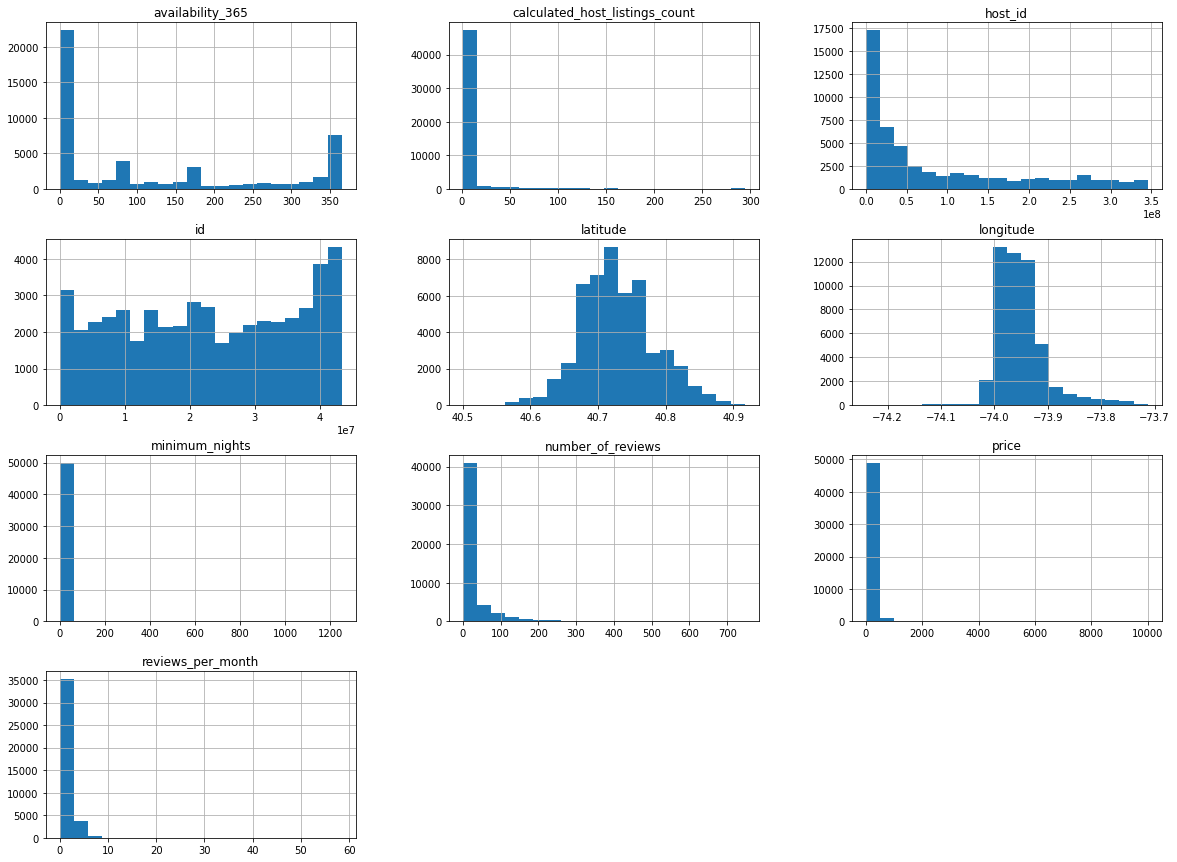

In [8]:
# plotar o histograma das variáveis numéricas
df.hist(bins=20, figsize=(20,15));

*É possível constatar que apenas as variáveis de classificação **float** e **int** são plotadas no gráfico. No entanto, as variáveis não numéricas, definidas por **object**, não podem ser plotadas no histograma*

### **Q4. Há *outliers* presentes?**

Pela distribuição do histograma, é possível verificar indícios da presença de *outliers*. Olhe por exemplo as variáveis `price`, `minimum_nights` e `calculated_host_listings_count`.

Os valores não seguem uma distruição, e distorcem toda a representação gráfica. Para confirmar, há duas maneiras rápidas que auxiliam a detecção de *outliers*. São elas:

* Resumo estatístico por meio do método `describe()`
* Plotar `boxplots` para a variável.

In [9]:
# ver o resumo estatístico das variáveis numéricas
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,50246.000000,50246.000000,50246.000000,39216.000000,50246.000000,50246.000000
mean,163.130777,7.912968,24.410978,1.091541,7.046292,121.786530
std,421.687803,21.472286,48.609159,1.425768,28.428846,140.634991
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,68.000000,1.000000,1.000000,0.160000,1.000000,0.000000
50%,104.000000,3.000000,5.000000,0.510000,1.000000,65.000000
75%,175.000000,5.000000,24.000000,1.570000,2.000000,249.000000
max,10000.000000,1250.000000,746.000000,58.430000,294.000000,365.000000


Olhando o resumo estatístico acima, podemos confirmar algumas hipóteses como:

* A variável `price` possui 75% do valor abaixo de 175, porém seu valor máximo é 10000.
* A quantidade mínima de noites (`minimum_nights`) possui um 75% das estadias compreendidadas em até 5 dias, mas é possível verificar um *outliers* de 1250 noites.

#### Boxplot para variável *minimum_nights*


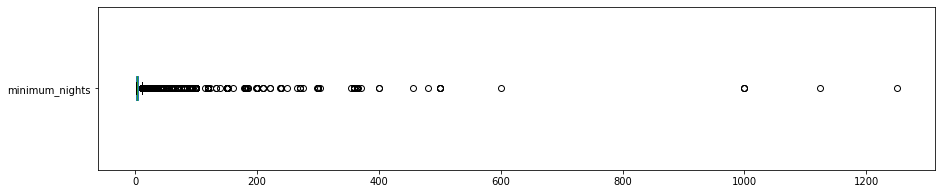

minimum_nights: valores acima de 30:
772 entradas
1.54%


In [10]:
# minimum_nights
df.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# ver quantidade de valores acima de 30 dias para minimum_nights
print("minimum_nights: valores acima de 30:")
print("{} entradas".format(len(df[df.minimum_nights > 30])))
print("{:.2f}%".format((len(df[df.minimum_nights > 30]) / df.shape[0])*100))

#### Boxplot para variável *price*

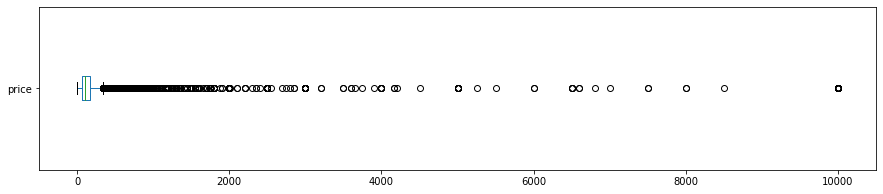


price: valores acima de 1500:
213 entradas
0.42%


In [12]:
# price
df.price.plot(kind='box', vert=False, figsize=(15, 3),)
plt.show()

# ver quantidade de valores acima de 1500 para price
print("\nprice: valores acima de 1500:")
print("{} entradas".format(len(df[df.price > 1500])))
print("{:.2f}%".format((len(df[df.price > 1500]) / df.shape[0])*100))

# df.price.plot(kind='box', vert=False, xlim=(0,1300), figsize=(15,3));

#### Histogramas sem *outliers*

Já que identificamos *outliers* nas variáveis `price` e `minimum_nights`, vamos agora limpar o *DataFrame* e plotar novamente o histograma.

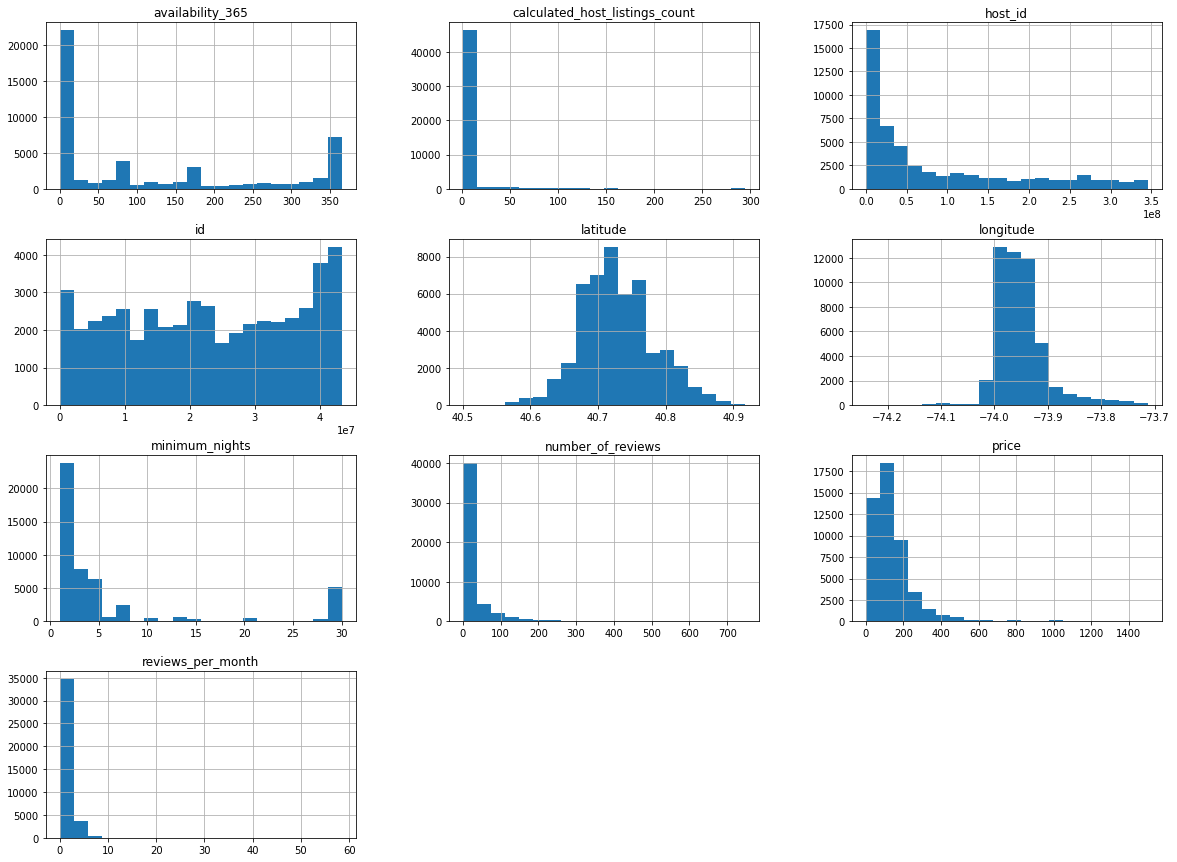

In [13]:
# remover os *outliers* em um novo DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 1500].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)


# plotar o histograma para as variáveis numéricas
df_clean.hist(bins=20, figsize=(20,15));

Ao retirar os *outliers* foi possível vizualizar alguns pontos no histograma:

* A maioria dos hópedes fica hospedada por até 5 dias;
* Algumas hospedagem mostraram que há, também, uma preferência de hospedagem pelo período de 30 dias;
* Os preços de hospedagem estão concentrados, em sua maioria, na faixa de até $400;

### **Q4. Qual a correlação existente entre as variáveis**

Correlação significa que existe uma relação entre dois parâmetros. Neste contexto, vamos buscar a relação ou semelhança entre duas variáveis.

Essa relação pode ser medida, e é função do coeficiente de correlação estabelecer qual a intensidade dela. Para identificar as correlações existentes entre as variáveis de interesse, deve-se:

* Criar uma matriz de correlação
* Gerar um *heatmap* a partir dessa matriz, usando a biblioteca `seaborn`

In [20]:
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()

display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,0.019900,-0.051411,-0.035240,0.047389,0.093127
minimum_nights,0.019900,1.000000,-0.141591,-0.178988,0.412408,0.256118
number_of_reviews,-0.051411,-0.141591,1.000000,0.699137,-0.080948,0.191411
reviews_per_month,-0.035240,-0.178988,0.699137,1.000000,-0.064904,0.213100
calculated_host_listings_count,0.047389,0.412408,-0.080948,-0.064904,1.000000,0.170599
availability_365,0.093127,0.256118,0.191411,0.213100,0.170599,1.000000


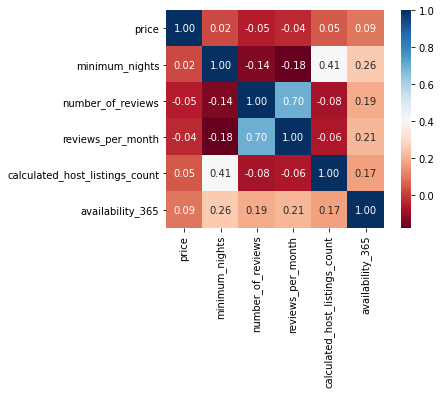

In [21]:
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

A coluna da variável `room_type` indica o tipo de locação que está anunciada no Airbnb. Se você já alugou no site, sabe que existem opções de apartamentos/casas inteiras, apenas o aluguel de um quarto ou mesmo dividir o quarto com outras pessoas.

Vamos contar a quantidade de ocorrências de cada tipo de aluguel, usando o método `value_counts()`.

In [27]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Entire home/apt    25448
Private room       22278
Shared room         1120
Hotel room           433
Name: room_type, dtype: int64

In [28]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts() / df_clean.shape[0]

Entire home/apt    0.516407
Private room       0.452079
Shared room        0.022728
Hotel room         0.008787
Name: room_type, dtype: float64

A distribuição da quantidade de imóveis por distrito se dispõe da seguintes forma:

In [29]:
#Lista dos distritos com maior volume de imóveis disponíveis
df_clean.neighbourhood_group.value_counts()

Manhattan        21824
Brooklyn         19805
Queens            6098
Bronx             1185
Staten Island      367
Name: neighbourhood_group, dtype: int64

In [30]:
# mostrar a porcentagem de imóveis por distrito
df_clean.neighbourhood_group.value_counts() / df_clean.shape[0]

Manhattan        0.442866
Brooklyn         0.401895
Queens           0.123744
Bronx            0.024047
Staten Island    0.007447
Name: neighbourhood_group, dtype: float64

### **Q6. Qual a localidade mais cara de Nova Iorque?**



* Breve descrição da cidade

A cidade de Nova Iorque é considerada uma das **maiores capitais culturais do planeta**!!

Apesar de se tratar de um grande centro comercial, a cidade possui cenários belíssimos como o **Central Park** com 341 hectares de área verde e o **Prospect Park**, localizado no Brooklyn.

Nela ainda estão presentes atrações mundialmente famosas como a Estátua da Liberdade e a Times Square.


<center><img alt="Analisando Airbnb" width="30%" src="https://www.visitenovayork.com.br/wp-content/uploads/2013/07/Estatua-da-Liberdade-Liberty-Island.jpg"></center> 

<center><img alt="Analisando Airbnb" width="30%" src="https://www.visitenovayork.com.br/wp-content/uploads/2013/07/Times-Square-em-Nova-York-1-300x226.jpg"></center>




A  mesma também já serviu de cenário para diversos filmes famosos, como: **O Lobo de Wall Street (2013)**, **Os Vingadores (2012)**, **Bonequinha de Luxo (1961)**, dentre outros.

Além disso, a cidade oferece uma variedade de museos, restaurantes, lojas e muita diversão para gostos variados. Por isso, é considerada por muitos como **CIDADE QUE NUNCA DORME!!**.

Segundo a [Folha de São Paulo](https://www1.folha.uol.com.br/turismo/2019/01/nova-york-bate-recorde-e-recebe-65-milhoes-de-turistas-em-2018.shtml), no ano de 2018, a cidade de Nova Iorque recebeu mais de 65 milhões de turístas. Esse grande volume de pessoas movimenta intensamente a indústria do turismo. 

Considerado como um item caro da viagem, hospedar-se em Nova Iorque com um bom **custo x benefício** não é uma tarefa fácil. A busca por uma localização privilegiada, com fácil acesso aos serviços de transporte tona-se difícil, dado aos elevados preços oferecidos pelas redes hoteleiras.

Por isso, alugar imovéis particulares é uma saída para baratear o custo da sua viagem dos sonhos.

Diante do exposto, este projeto avalia os preços x período de estadia disponibilizados pelo site da **Airbnb** na **cidade de Nova Iorque**.



Uma maneira de se verificar uma variável em função da outra é usando `groupby()`. No caso, queremos comparar os distritos (*neighbourhoods_group*) a partir do preço de locação.

In [32]:
df_clean.groupby(['neighbourhood_group']).price.mean().sort_values(ascending=False)[:10]

neighbourhood_group
Manhattan        178.301320
Brooklyn         118.594294
Staten Island    107.068120
Queens            94.751394
Bronx             91.231224
Name: price, dtype: float64

Já é possível constatar que os distritos de Manhattan e Brooklyn são os mais caros para se hospedar, já os distritos do Queens e Bronx estão entre os mais baratos.

* Caso seja necessário verificar a lista de imóveis de determinado distrito (neighbourhood_group), pode-se optar pela seguinte distribuição:

In [0]:
# ver quantidade de imóveis em Manhattan
print(df_clean[df_clean.neighbourhood_group == "Manhattan"].shape)

# ver as 21824 entradas do Manhattan
df_clean[df_clean.neighbourhood_group == "Manhattan"]


In [0]:
# ver quantidade de imóveis Brooklyn
print(df_clean[df_clean.neighbourhood_group == "Brooklyn"].shape)

# ver as 19805 entradas do Brooklyn
df_clean[df_clean.neighbourhood_group == "Brooklyn"]


Como são fornecidas as Latitudes e Longitudes para os imóveis, é possível plotar cada ponto. Para isso, considera-se `x=longitude` e `y=latitude`.

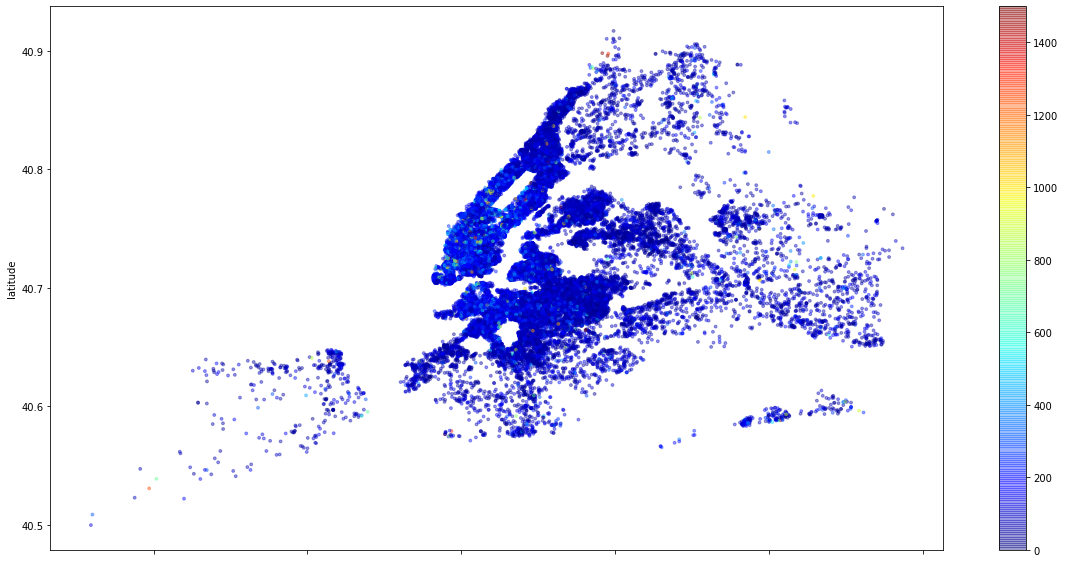

In [37]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(20,10));

## Conclusões

Ao analisar os dados disponibilizados pelo Airbnb foi possível constatar algumas informações relevantes para quem deseja se hospedar na cidade de Nova Iorque, aproveitando ao máximo com melhor custo x benefício.

Foi identificado que o site disponibiliza 50.246 opções de hospedagens diferentes, e que estão subdivididas nas seguintes categorias: casa ou apartamento (inteiro), quarto privativo, quarto compartilhado ou quarto de hotel.

A disponibilidade de imóveis completos representa 51,64% da amostra, já os quartos privativos 45,20%. Isso quer dizer que existe uma maior oferta de imóveis inteiros e quartos privativos dentro do site, uma vez que, os demais tipos que hospedagem não atingem 4%.



* Localização

Com relação a localização dos imóveis, 44,28% deles estão no distrito de Manhattan.

Pode-se afirmar que neste no bairro de *Midtown* estão localizadas as principais atrações turísticas da cidade, como: *The Empire State Building, Fifth Avenue,Times Square, Theater District, Top of the Rock, Rockefeller Center*, dentre outras.
Aqui é possível fazer grande parte do trajeto turístico a pé ou de metrô.



Já o distrito de Broklyn concentra 40,18% dos imóveis disponíveis.

Quem procura fugir das badalações turísicas tradicionais, este bairro é uma boa opção. Considerado por muitos como um bairro alternativo, apresenta um conjunto de bares, restaurante, cafés, arquitetura urbana e parques variados. 
Nele também está localizada a famosa Brooklyn Bridge e o Prospect Park. 
Além disso, a procura por essa região vem crescendo nos últimos anos pelo fácil acesso ao metrô e ônibus no translato até Manhattan.

* Preços

Quanto aos preços, pode-se aferir que dentro da amostra Manhattan e Brooklyn possuem os imóveis mais caros, já os distritos do Queens e Bronx são os mais baratos.
No entanto, se você é um turísta, deseja visitar as principais atrações da cidade e ter acesso a transporte farto, o ideal é esolher um dos bairros de Manhattan ou Brooklyn.

O preços podem variar dependendo do tipo de hospedagem, mas, em média o valor é de 178 por dia em Manhattan e 118 por dia no Brooklyn.





Em suma, para escolher a localização de sua hospedagem na cidade de Nova Iorque é necessário pesquisar primeiro quais monumentos, parques, *shows* e atrações turísticas deseja visitar. 

Pois essa escolha irá influenciar no distrito ou bairro selecionado, impactando diretamente no preço de sua diária.

Por isso, a dica é:

* Pesquise no google as principais atrações que a cidade oferece;
* Veja quantos dias você tem disponível na viagem;
* Faça uma lista das atrações que deseja visitar;
* Verifique quais distritos e bairros são mais próximos dessas atrações;

Após seguir essas três etapas será mais fácil escolher sua hospedagem.

###Boa viagem!